# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# Code to read the dataset from the ab_data.csv file.
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# Code to read the number of rows and columns from the dataset.
num_rows = df.shape
num_columns = df.shape
num_rows = num_rows[0]
num_columns = num_columns[1]


print(f'There are {num_rows} rows and {num_columns} columns in the dataset.')

There are 294478 rows and 5 columns in the dataset.


**c.** The number of unique users in the dataset.

In [4]:
# Code to read the number of unique values in each column.
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [5]:
# Code to read the proportion of converted users.
print(f'The proportion of converted users: {(df.converted.mean()*100):.2f}%')

The proportion of converted users: 11.97%


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# Code to find the difference between new_page and treatment.
num_times = df.query('group == "treatment" and landing_page != "new_page"').count()[0]
print(f'{num_times} times when the "group" is treatment but the "landing_page" is not a new_page.')


1965 times when the "group" is treatment but the "landing_page" is not a new_page.


**f.** Do any of the rows have missing values?

In [7]:
# Code to check for null values.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
# Source to make a copy of df2 because it came up with copy errors all the time.
# https://stackoverflow.com/questions/32573452/settingwithcopywarning-even-when-using-locrow-indexer-col-indexer-value
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")').copy()

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2["group"] == "treatment") == (df2["landing_page"] == "new_page")) == False].shape[0]

0

In [10]:
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
# Code to check for unique values in columns.
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [12]:
# Code to check for unique user_ids in df2.
df2_userid_unique = df2.user_id.nunique()
print(f'There are {df2_userid_unique} unique user_ids in df2.')

There are 290584 unique user_ids in df2.


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# Code to check for duplicate values in dataset.
df2["user_id"].duplicated().sum()

1

In [14]:
# Code to display duplicate values in dataset.
df2[df2["user_id"].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [15]:
# Code to display user_id duplicate rows.
df2.query("user_id == '773192'")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [16]:
# Code to convert the timestamps in the duplicate user_ids so they match.
# Source to help with timestamp change:
# https://www.digitalocean.com/community/tutorials/update-rows-and-columns-python-pandas
df2.loc[1899, ["timestamp"]] = ["2017-01-14 02:55:59.590927"]

In [17]:
# Code to verify timestamp values match.
df2.query("user_id == '773192'")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [18]:
# Code to drop duplicate values in the dataset.
df2.drop(df2[df2["user_id"] == 773192].head(1).index, inplace = True)

In [19]:
# Code to double if the row with a duplicate user_id is deleted or not.
df2["user_id"].duplicated().sum()

0

In [20]:
# Code to confirm user_id number 773192 is not duplicated.
df2.query("user_id == '773192'")

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [21]:
# Code to calculate p_population.
p_population = df2.converted.mean()
print(f'There is a {(p_population*100):.2f}% chance of an individual converting regardless of the page they receive.')

There is a 11.96% chance of an individual converting regardless of the page they receive.


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# Code to calculate p_control.
p_control = df2[df2.group == 'control'].converted.mean()
print(f'There is a {(p_control*100):.2f}% chance that an individual was in the control group and converted.')

There is a 12.04% chance that an individual was in the control group and converted.


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
# Code to calculate p_treatment.
p_treatment = df2[df2.group == 'treatment'].converted.mean()
print(f'There is a {(p_treatment*100):.2f}% chance that an individual was in the treatment group and converted.')

There is a 11.88% chance that an individual was in the treatment group and converted.


In [24]:
# # Code to calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treatment - p_control
print(f'The actual difference "obs_diff" between the conversion rates for the two groups is: {(obs_diff*100):.2f}%.')


The actual difference "obs_diff" between the conversion rates for the two groups is: -0.16%.


**d.** What is the probability that an individual received the new page?

In [25]:
# Code to calculate p_received. 
p_received = df2[df2.landing_page == 'new_page'].count().sum()/df2.count().sum()
print(f' There is a {(p_received)*100:.2f}% that an individual received the new page.')


 There is a 50.01% that an individual received the new page.


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

### Answer:

From the above statistics, the new treatment group failed to show a significant increase in conversion rates. The treatment group had a 11.88% chance of conversion, whereas the control group had a 12.04% chance of conversion, so the treatment group had a smaller conversion rate than the control group. There is a slim difference between the control group and the treatment group, a 0.0016 difference in favor of the control group. Moreover, there is a 11.96% chance that an individual converted no matter the page they received, which is higher than the treatment group. 

Based on the data, there is no significant difference between the groups; therefore, the treatment group does not perform better than either the control group or random people visiting the page.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

### Answer:

### <center> $H_{0}: P_{new} - P_{old} \leq 0$ </center>

### <center> $H_{1}: P_{new} - P_{old} > 0$ </center>

### <center> $\alpha: 0.05$ </center>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [26]:
# Code to find the conversion rate for p_new = p_old = p_population.
p_new = df2.converted.mean()
print(f'The p_new conversion rate under the null hypothesis: {(p_new*100):.2f}%')

The p_new conversion rate under the null hypothesis: 11.96%


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [27]:
# Code to find the conversion rate for p_old = p_new = p_population.
p_old = df2.converted.mean()
print(f'The p_old conversion rate under the null hypothesis: {(p_old*100):.2f}%')

The p_old conversion rate under the null hypothesis: 11.96%


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [28]:
# Code to find number of individuals in the treatment group.
n_new = df2[df2.group == 'treatment'].user_id.count()
print(f'The n_new number of individuals in the treatment group: {n_new}')

The n_new number of individuals in the treatment group: 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [29]:
# Code to find number of individuals in the control group.
n_old = df2[df2.group == 'control'].user_id.count()
print(f'The n_old number of individuals in the control group: {n_old}')

The n_old number of individuals in the control group: 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [30]:
# # Code to simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
# Code to find the mean of new_page_converted value.
new_page_converted.mean()

0.88152914458743381

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [32]:
# # Code to simulate a Sample for the control Group
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
# Code to find the mean of old_page_converted value.
old_page_converted.mean()

0.87977201701612129

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [34]:
# Code to calculate converted_probability.
converted_prob_diff = new_page_converted.mean() - old_page_converted.mean()
print(f'The difference in the converted probability for the simulated samples: {(converted_prob_diff):.2f}%')

The difference in the converted probability for the simulated samples: 0.00%



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [35]:
# # Code to calculate sampling distribution. 
p_diffs = []

for i in range (10000):
    new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
    old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
    diffs = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart. 

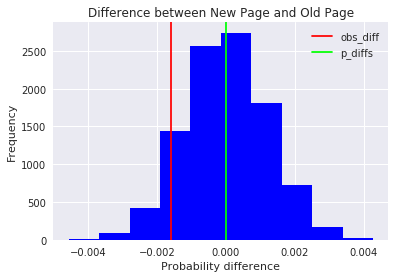

In [36]:
# Code to plot a histogram of the p_diffs.
plt.hist(p_diffs, color = 'blue');
plt.axvline(obs_diff, color = 'red', label = 'obs_diff')
plt.axvline(np.array(p_diffs).mean(), color='lime', label = 'p_diffs');
plt.xlabel('Probability difference');
plt.ylabel('Frequency');
plt.title('Difference between New Page and Old Page');
leg = plt.legend()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [37]:
# Code to find the difference between the p_diffs and actual difference observed.
p_diffs=np.array(p_diffs)
actual_difference = df2.loc[df2["group"] == "treatment", "converted"].mean() - df2.loc[df2["group"] == "control", "converted"].mean()
p_diffs_greater = (p_diffs > actual_difference).mean()
print(f'The actual difference in observed df2 data: {actual_difference}')
print(f'The proportion of the p_diffs greater than the actual difference observed: {p_diffs_greater} or {(p_diffs_greater*100):.2f}%.')



The actual difference in observed df2 data: -0.0015782389853555567
The proportion of the p_diffs greater than the actual difference observed: 0.9099 or 90.99%.


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

### Answer:

When conducting hypothesis tests, the assumption is that the **$H_0$** is true. Assuming **$H_0$** is true, the __p-value__, or the probability value, describes the likelihood that the given data will occur by random chance. Since the __p-value__ is significantly greater than the alpha value set at 5% (0.9053 > 0.05) we will fail to reject the **$H_0$** , and thus we cannot conclude that the new page converts more users than the old page. Statistically, it would be more prudent to stay with the old page until more data can be studied.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [38]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("group == 'control' & converted == 1").shape[0]

# number of conversions with the new_page
convert_new = df2.query("group == 'treatment' & converted == 1").shape[0]

# number of individuals who were shown the old_page
n_old = df2[df2.group == "control"].user_id.count()

# number of individuals who received new_page
n_new = df2[df2.group == "treatment"].user_id.count()

convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

In [39]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
print(f'Z-Score: {z_score}')
print(f'P-Value: {p_value}')

Z-Score: 1.3109241984234394
P-Value: 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

> The p-value (0.9051) is very close to the p-value calculated earlier (0.9053). The z-score is distance in standard deviations a value is away from the mean. The z-score of 1.311  indicates the value is 1.311 standard deviations from the mean.  For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. The z-score of 1.311 is less than 1.645, so we cannot reject the null hypothesis. Likewise, the p-value of of 0.9051 is greater than alpha at 0.05 significance level, so again, we fail to reject $H_0$.  

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

### Answer:
Since we have categorical data that only has two outcomes (either conversion or no conversion, or the probability of 0 or 1) we will use logistic regression.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [40]:
#Code to create two new columns in df2 dataframe.
df2["intercept"] = 1
df2["ab_page"] = pd.get_dummies(df2.group)['treatment']

In [41]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [42]:
# Code to create regression model.
y = df2['converted']
x = df2[['intercept', 'ab_page']]
log_reg = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
log_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-06 22:36 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>The p-value associated with the ab_page (p-value = 0.1899) is significantly off from the section "J" and "K" p-value (0.9051 and 0.9053). The assumption of equivelence or equal probability between the new page and old page is the underlying factor that contributed to the difference. In sections "J" and "K" a one-tailed test was used, whereas in the regression section, a two-tailed test was used. Either way, both p-values are larger than the alpha value of 0.05, so we, again, fail to reject the $H_0$.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Thinking of other factors that influence individual converts is appropriate if they do not negatively add too many variables to the dataset. Age, culture, and gender may add to categories for more analysis, but one needs to be careful not to affect the confidence intervals of the regression model. Adding too many factors creates a regression model that is prone to irregularities. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [44]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


In [45]:
#Code to verify row count and column count.
df2.shape

(290584, 7)

In [46]:
# Code to read the countries.csv
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
# Code to join with the df2 dataframe using .copy() to keep from having errors.
df_merged = df3.set_index("user_id").join(df2.set_index("user_id"), how = "inner").copy()
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [48]:
# Code to create the necessary dummy variables
df_merged[["CA", "UK", "US"]] = pd.get_dummies(df_merged["country"])
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [49]:
# Code to create regression model.
y = df_merged['converted']
x = df_merged[['intercept', 'ab_page', 'UK', 'US',]]
log_reg = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [50]:
log_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-06 22:36 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

### Summary for section G:
>After adding additional features (UK and US) to the regression model, the ab_page's and courntry's p-values are still above the alpha significance level of 0.05. The ab_page's p-value is 0.19, the UK's p-value is 0.75, and the US's p-value is 0.13. Since the p-value < alpha, we again, fail to reject the $H_0$ and conclude that neither country impacts the conversion rate.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [51]:
# # Code to calculate create new columns to see the interaction between page and country conversions.
df_merged["CA_page"] = df_merged["CA"] * df_merged["ab_page"]
df_merged["UK_page"] = df_merged["UK"] * df_merged["ab_page"]
df_merged["US_page"] = df_merged["US"] * df_merged["ab_page"]

In [52]:
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_page,UK_page,US_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [53]:
# # Code to fit your model, and summarize the results
y = df_merged["converted"]
x = df_merged[["intercept","ab_page", "CA_page", "UK_page"]]
log_reg = sm.Logit(y, x).fit()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-02-06 22:36 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
CA_page      -0.0644    0.0384    -1.6788  0.0932  -0.1396   0.0108
UK_page       0.0257    0.0188     1.3634  0.1728  -0.0112   0.0625
==================================================================

"""

In [54]:
# Code to find the odds ratio and confidence intervals.
# Source: https://stackoverflow.com/questions/37647396/statsmodels-logistic-regression-odds-ratio
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
intercept  0.134717  0.139043    0.136863
ab_page    0.957934  1.006469    0.981901
CA_page    0.869694  1.010848    0.937618
UK_page    0.988837  1.064530    1.025986


Text(0,0.5,'Odds (0,1)')

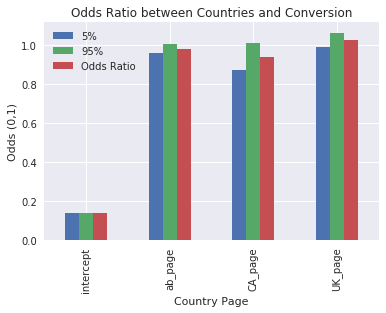

In [55]:
np.exp(conf).plot(kind='bar')
plt.title("Odds Ratio between Countries and Conversion")
plt.xlabel("Country Page")
plt.ylabel("Odds (0,1)")

### Summary for section H:
> Looking at all of the p-values in the regression model:
1. ab_page p-value > than alpha (0.1475 > 0.05).
2. UK_page p-value > than alpha (0.1728 > 0.05).
3. CA_page p-value < than alpha (0.0932 > 0.05).

> The ab_page, UK_page, and US_page all have a p-value greater than the alpha value of 0.05. As compared to the models above, we conclude that neither variables impact page conversion.

> Looking at the odds ratio between each country's page, we notice that all countries are close to an odds ratio of 1.0. An odds ratio of 1.0 or very close to 1.0 indicates that the odds of the treatment group users converting compared to the control group users is negligible. An odds ratio of 1.0 or close suggests no causal relationships or strong associations. 

## Conclusion:

 

> The data provided by an e-commerce website for the current analysis reveals no significant difference between the control group users and the treatment group users. All three parts of the study indicated no significant difference between the groups. The treatment group failed to increase conversion rates. The control group had a slight lead in conversion compared to the treatment group (12.04% vs 11.88%), a difference of 0.0016. Additionally, nearly 12% of individuals converted no matter which page they received. 

> Ultimately, we fail to reject $H_0$ and conclude that the new page is no better at converting new individuals than the current e-commerce webpage.  



## Sources used:

> Pandas: https://pandas.pydata.org/docs/

> Matplotlib: https://matplotlib.org/stable/index.html

> NumPy: https://numpy.org/doc/

> Seaborn: https://seaborn.pydata.org/

> GeeksforGeeks: https://www.geeksforgeeks.org/pandas-tutorial/

> W3Schools: https://www.w3schools.com/python/pandas/default.asp

> Odds interpreting: https://www.cdc.gov/training/SIC_CaseStudy/Interpreting_Odds_ptversion.pdf

> Stackoverflow.com: https://stackoverflow.com/questions/32573452/settingwithcopywarning-even-when-using-locrow-indexer-col-indexer-value


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0